In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import ast
# Load your DataFrame here
df = pd.read_csv('60_min_news_combined.csv')
pd.options.mode.chained_assignment = None

In [60]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,date,...,Retail & Wholesale,Economy - Monetary,Life Sciences,Energy & Transportation,Real Estate & Construction,Blockchain,IPO,Mergers & Acquisitions,Economy - Fiscal,Economy - Macro
0,2021-12-02 00:00:00,4534.50,4539.00,4531.50,4537.50,4537.50,0,False,False,2021-12-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-12-02 01:00:00,4537.50,4549.00,4533.00,4547.75,4547.75,13314,False,False,2021-12-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2021-12-02 02:00:00,4547.50,4552.00,4531.50,4536.50,4536.50,25623,False,False,2021-12-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021-12-02 03:00:00,4536.50,4540.75,4524.50,4536.50,4536.50,34609,False,False,2021-12-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-12-02 04:00:00,4536.25,4549.75,4533.75,4542.75,4542.75,24214,False,False,2021-12-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13773,2024-04-26 12:00:00,5134.00,5143.25,5129.25,5143.25,5143.25,98685,False,True,2024-04-26,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
13774,2024-04-26 13:00:00,5143.25,5146.50,5138.50,5141.75,5141.75,104327,False,True,2024-04-26,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
13775,2024-04-26 14:00:00,5141.75,5142.50,5133.25,5141.50,5141.50,94654,False,True,2024-04-26,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
13776,2024-04-26 15:00:00,5141.25,5144.00,5128.75,5129.50,5129.50,181727,True,True,2024-04-26,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819


In [61]:
df.isnull().sum()

Datetime                       0
Open                           0
High                           0
Low                            0
Close                          0
Adj Close                      0
Volume                         0
Random                         0
Chronological                  0
date                           0
RSI                           13
overall_sentiment_score        0
Technology                     0
Financial Markets              0
Manufacturing                  0
Earnings                       0
Finance                        0
Retail & Wholesale             0
Economy - Monetary             0
Life Sciences                  0
Energy & Transportation        0
Real Estate & Construction     0
Blockchain                     0
IPO                            0
Mergers & Acquisitions         0
Economy - Fiscal               0
Economy - Macro                0
dtype: int64

In [62]:
df.set_index('Datetime', inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,date,RSI,...,Retail & Wholesale,Economy - Monetary,Life Sciences,Energy & Transportation,Real Estate & Construction,Blockchain,IPO,Mergers & Acquisitions,Economy - Fiscal,Economy - Macro
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-12-02 00:00:00,4534.50,4539.00,4531.50,4537.50,4537.50,0,False,False,2021-12-02,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-02 01:00:00,4537.50,4549.00,4533.00,4547.75,4547.75,13314,False,False,2021-12-02,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-02 02:00:00,4547.50,4552.00,4531.50,4536.50,4536.50,25623,False,False,2021-12-02,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-02 03:00:00,4536.50,4540.75,4524.50,4536.50,4536.50,34609,False,False,2021-12-02,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-02 04:00:00,4536.25,4549.75,4533.75,4542.75,4542.75,24214,False,False,2021-12-02,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 12:00:00,5134.00,5143.25,5129.25,5143.25,5143.25,98685,False,True,2024-04-26,72.020725,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
2024-04-26 13:00:00,5143.25,5146.50,5138.50,5141.75,5141.75,104327,False,True,2024-04-26,68.421053,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
2024-04-26 14:00:00,5141.75,5142.50,5133.25,5141.50,5141.50,94654,False,True,2024-04-26,68.421053,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819


In [63]:
# Split data into training and testing sets
train_df = df[df['Chronological']==False]
test_df = df[df['Chronological']==True]

In [81]:
time_step = 30
def create_dataset(data, features, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[features][i:(i + time_step)].to_numpy()  # Select the required features
        X.append(a)
        y.append(data['Close'][i + time_step])
    return np.array(X), np.array(y)

# Selecting features
features = ['Close','overall_sentiment_score', 'Technology', 'Financial Markets', 'Manufacturing', 'Earnings', 'Finance', 'Retail & Wholesale', 'Economy - Monetary', 'Life Sciences', 'Energy & Transportation', 'Real Estate & Construction', 'Blockchain', 'IPO', 'Mergers & Acquisitions', 'Economy - Fiscal', 'Economy - Macro']
X_train, y_train = create_dataset(train_df, features, time_step)
X_test, y_test = create_dataset(test_df, features, time_step)


In [83]:
X_train.shape

(11895, 30, 17)

In [84]:
feature_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = feature_scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_test_scaled = feature_scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

In [85]:
# Initialize scaler for the target variable
target_scaler = MinMaxScaler(feature_range=(0, 1))
# Scale y_train and y_test
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

In [86]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_step, len(features))),
    LSTM(100),
    Dense(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
186/186 [==============================] - 10s 34ms/step - loss: 0.0050 - val_loss: 3.8603e-04
Epoch 2/10
186/186 [==============================] - 6s 31ms/step - loss: 3.4279e-04 - val_loss: 0.0016
Epoch 3/10
186/186 [==============================] - 6s 30ms/step - loss: 3.1341e-04 - val_loss: 2.2963e-04
Epoch 4/10
186/186 [==============================] - 6s 31ms/step - loss: 3.3587e-04 - val_loss: 3.4947e-04
Epoch 5/10
186/186 [==============================] - 6s 33ms/step - loss: 2.9413e-04 - val_loss: 3.2401e-04
Epoch 6/10
186/186 [==============================] - 6s 33ms/step - loss: 2.6844e-04 - val_loss: 1.3958e-04
Epoch 7/10
186/186 [==============================] - 6s 31ms/step - loss: 2.4048e-04 - val_loss: 2.4608e-04
Epoch 8/10
186/186 [==============================] - 6s 31ms/step - loss: 2.2712e-04 - val_loss: 4.8476e-04
Epoch 9/10
186/186 [==============================] - 6s 30ms/step - loss: 2.7538e-04 - val_loss: 1.5219e-04
Epoch 10/10
186/186 [=====

In [87]:
# Making predictions
train_predict = model.predict(X_train_scaled)
test_predict = model.predict(X_test_scaled)

# Inverse transform predictions
train_predict = target_scaler.inverse_transform(train_predict)
test_predict = target_scaler.inverse_transform(test_predict)

# Calculate error metrics
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

train_mape = mean_absolute_percentage_error(y_train, train_predict)
test_mape = mean_absolute_percentage_error(y_test, test_predict)
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

57/57 [==============================] - 1s 9ms/step
Train MSE: 488.83390001225945
Test MSE: 186.29471120554166
Train MAPE: 0.004150381123104828
Test MAPE: 0.0019487413588460164


In [94]:
train_df.index = pd.to_datetime(train_df.index)
test_df.index = pd.to_datetime(test_df.index)

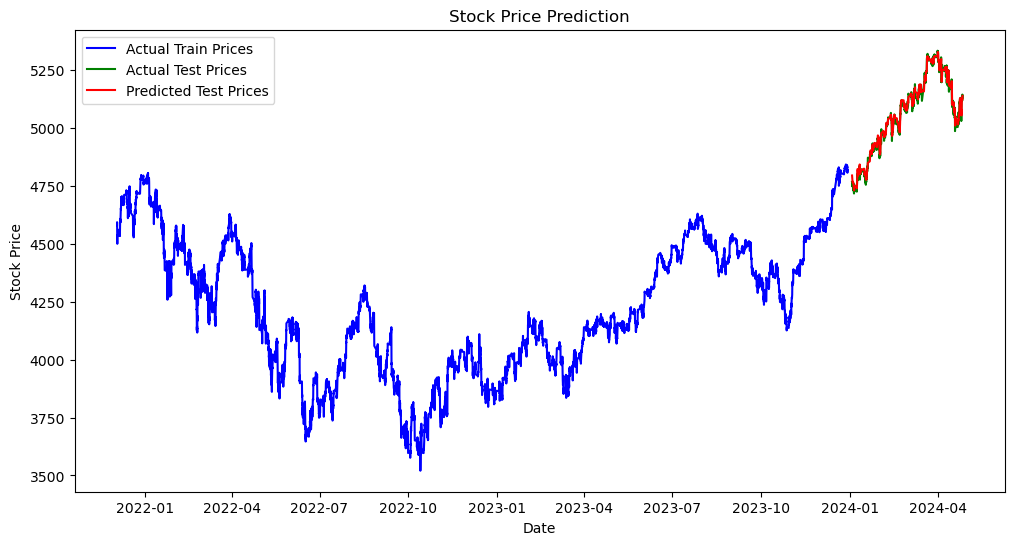

In [95]:
# Plotting
plt.figure(figsize=(12, 6))

# Correct the indices for train and test data to match the outputs
train_indices = train_df.index[time_step+1:len(train_predict)+time_step+1]
test_indices = test_df.index[time_step+1:len(test_predict)+time_step+1]

plt.plot(train_indices, y_train, label='Actual Train Prices', color='blue')
plt.plot(test_indices, y_test, label='Actual Test Prices', color='green')
plt.plot(test_indices, test_predict, label='Predicted Test Prices', color='red')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Starting capital: $100,000.00
Ending portfolio value: $113,214.12
Profit / Loss: $13,214.12


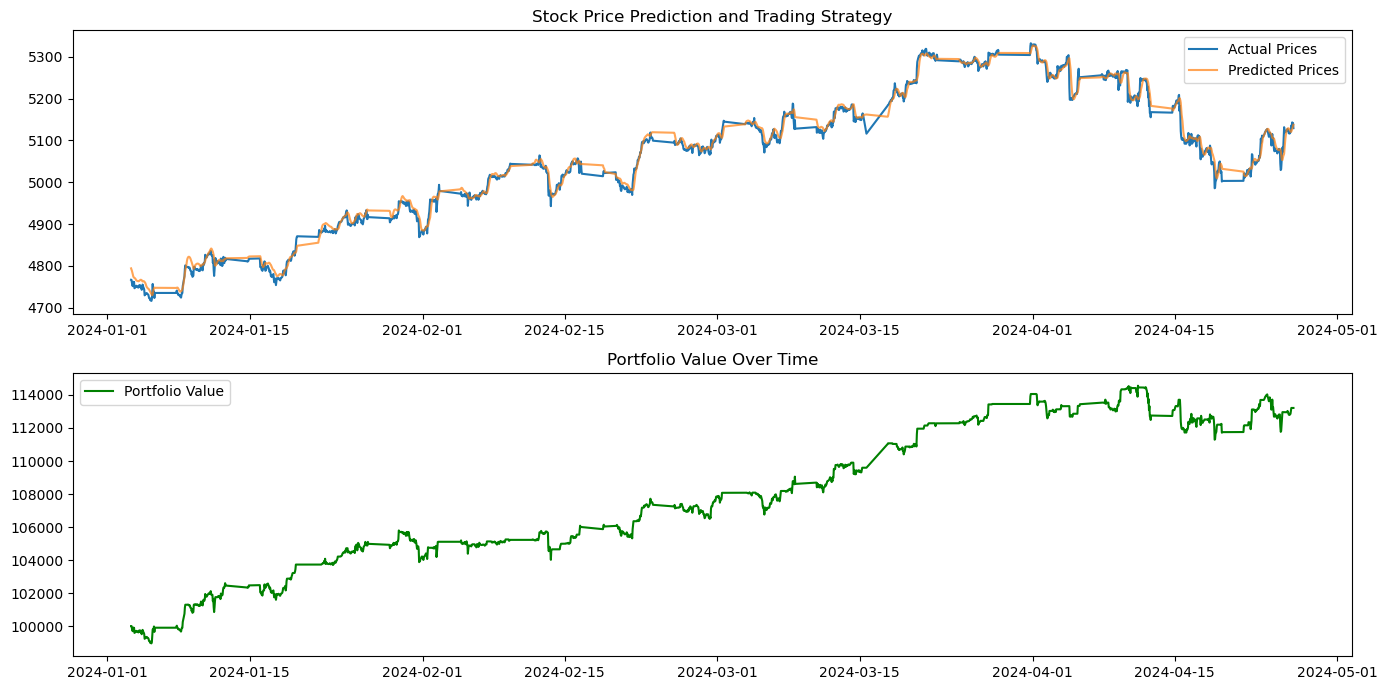

In [96]:
# Set initial capital and current holdings
initial_capital = 100000.0
current_holdings = 0.0
capital = initial_capital

# Create a DataFrame to store trades and capital over time
trading_record = pd.DataFrame(index=test_df.index[time_step+1:len(test_predict)+time_step+1])
trading_record['Actual'] = y_test_inv.ravel()
trading_record['Predicted'] = test_predict.ravel()
trading_record['Capital'] = initial_capital
trading_record['Holdings'] = 0.0

# Simulate trading
for i in range(1, len(trading_record)):
    if trading_record['Predicted'].iloc[i] > trading_record['Actual'].iloc[i-1]:
        # Buy signal: Invest all available capital
        if capital > 0:
            current_holdings = capital / trading_record['Actual'].iloc[i]
            capital = 0.0
    elif trading_record['Predicted'].iloc[i] < trading_record['Actual'].iloc[i-1]:
        # Sell signal: Sell all holdings
        if current_holdings > 0:
            capital = current_holdings * trading_record['Actual'].iloc[i]
            current_holdings = 0.0
    
    # Update capital and holdings records
    trading_record['Capital'].iloc[i] = capital
    trading_record['Holdings'].iloc[i] = current_holdings

# Calculate final value of portfolio (capital + value of holdings)
final_value = capital + current_holdings * trading_record['Actual'].iloc[-1]
print(f"Starting capital: ${initial_capital:,.2f}")
print(f"Ending portfolio value: ${final_value:,.2f}")
print(f"Profit / Loss: ${final_value - initial_capital:,.2f}")

# Plotting the backtest results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(trading_record.index, trading_record['Actual'], label='Actual Prices')
plt.plot(trading_record.index, trading_record['Predicted'], label='Predicted Prices', alpha=0.7)
plt.title('Stock Price Prediction and Trading Strategy')
plt.legend()

plt.subplot(2, 1, 2)
portfolio_value = trading_record['Capital'] + trading_record['Holdings'] * trading_record['Actual']
plt.plot(trading_record.index, portfolio_value, label='Portfolio Value', color='green')
plt.title('Portfolio Value Over Time')
plt.legend()

plt.tight_layout()
plt.show()


Starting capital: $100,000.00
Ending portfolio value: $107,031.16
Profit / Loss: $7,031.16


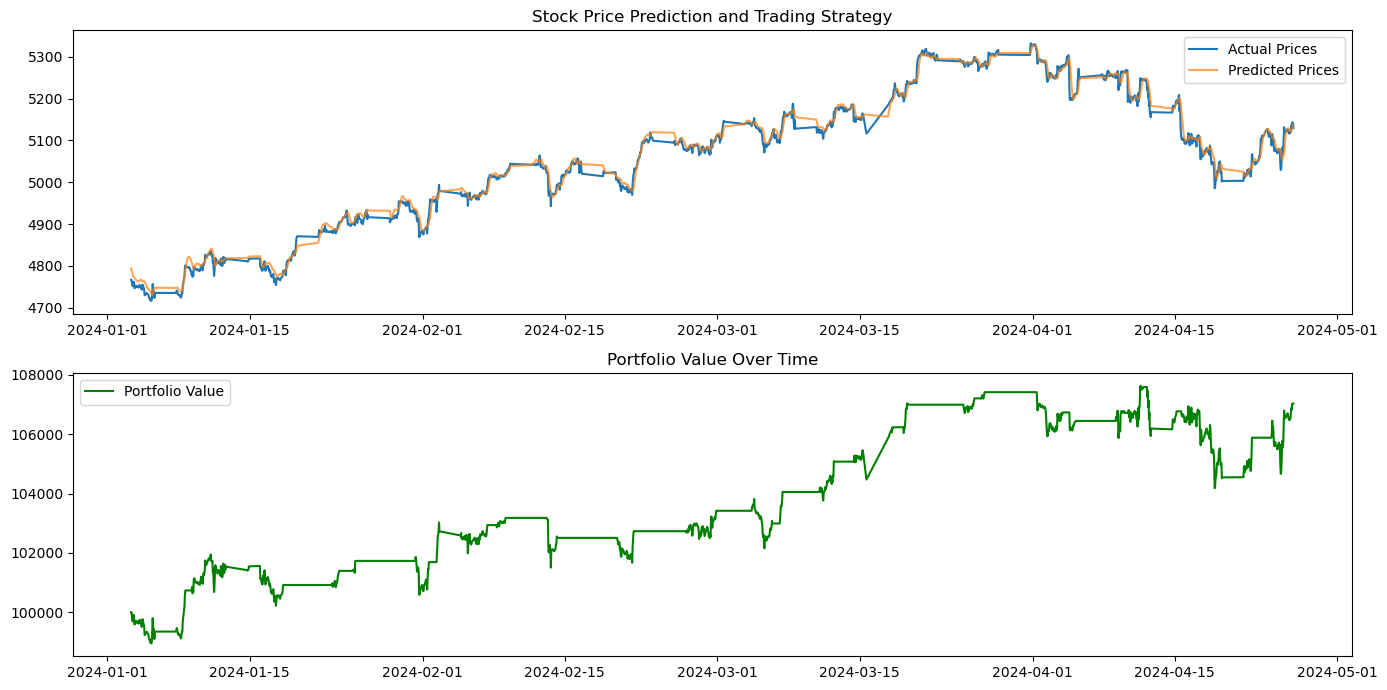

In [101]:
initial_capital = 100000.0
current_holdings = 0.0
capital = initial_capital

# Create a DataFrame to store trades and capital over time
trading_record = pd.DataFrame(index=test_df.index[time_step+1:len(test_predict)+time_step+1])
trading_record['Actual'] = y_test_inv.ravel()
trading_record['Predicted'] = test_predict.ravel()
trading_record['Capital'] = initial_capital
trading_record['Holdings'] = 0.0

# Simulate trading
for i in range(1, len(trading_record)):
    rsi_current = test_df['RSI'].iloc[i + time_step]
    if (trading_record['Predicted'].iloc[i] > trading_record['Actual'].iloc[i-1]) and rsi_current<30:
        # Buy signal: Invest all available capital
        if capital > 0:
            current_holdings = capital / trading_record['Actual'].iloc[i]
            capital = 0.0
    elif (trading_record['Predicted'].iloc[i] < trading_record['Actual'].iloc[i-1]) and rsi_current>70:
        # Sell signal: Sell all holdings
        if current_holdings > 0:
            capital = current_holdings * trading_record['Actual'].iloc[i]
            current_holdings = 0.0
    
    # Update capital and holdings records
    trading_record['Capital'].iloc[i] = capital
    trading_record['Holdings'].iloc[i] = current_holdings

# Calculate final value of portfolio (capital + value of holdings)
final_value = capital + current_holdings * trading_record['Actual'].iloc[-1]
print(f"Starting capital: ${initial_capital:,.2f}")
print(f"Ending portfolio value: ${final_value:,.2f}")
print(f"Profit / Loss: ${final_value - initial_capital:,.2f}")

# Plotting the backtest results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(trading_record.index, trading_record['Actual'], label='Actual Prices')
plt.plot(trading_record.index, trading_record['Predicted'], label='Predicted Prices', alpha=0.7)
plt.title('Stock Price Prediction and Trading Strategy')
plt.legend()

plt.subplot(2, 1, 2)
portfolio_value = trading_record['Capital'] + trading_record['Holdings'] * trading_record['Actual']
plt.plot(trading_record.index, portfolio_value, label='Portfolio Value', color='green')
plt.title('Portfolio Value Over Time')
plt.legend()

plt.tight_layout()
plt.show()
